In [7]:
import anndata
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from kb_python.utils import import_matrix_as_anndata
import anndata 
from scipy.io import mmread
import glob

fsize = 15
import sys

def nd(arr):
    return np.asarray(arr).reshape(-1)


def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, c="k", alpha=0.75, zorder=0)
    ax.set(**{"aspect": "equal", "xlim": lims, "ylim": lims})
    return ax


plt.rcParams.update({"font.size": fsize})
%config InlineBackend.figure_format = 'retina'

In [2]:
files = glob.glob("/home/cellatlas/human/data/lung/*/metrics/metrics.json")

In [3]:
!cat /home/cellatlas/human/data/lung/GSM4142873/metrics/metrics.json

{
  "ncells": 151,
  "ngenes": 60623,
  "nvals": 341578,
  "density": 0.03731431899221254,
  "avg_per_cell": 9309.092715231787,
  "avg_per_gene": 23.18712369892615,
  "min_cell": 651,
  "max_cell": 68143,
  "total_counts": 1405673,
  "overdispersion": 11.521081392392151
}


In [23]:
# df = pd.read_json("/home/cellatlas/human/data/all_metrics.json")
df = pd.read_json("/home/cellatlas/human/data/complete_metrics.json")

In [36]:
df["total_counts"]

0       9811726
1        148803
2       2385133
3        738135
4       1232498
         ...   
512    19877485
513    48082162
514    54368745
515    12768281
516    46866650
Name: total_counts, Length: 517, dtype: int64

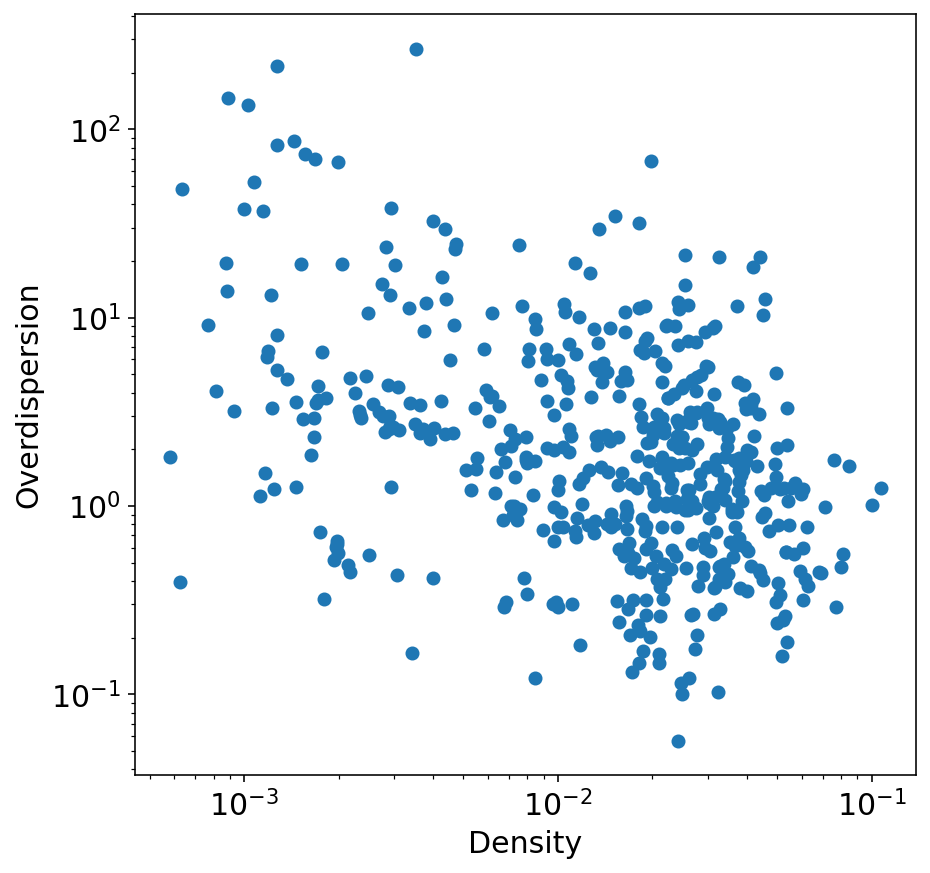

In [25]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df["density"], df["overdispersion"])
ax.set(**{
    "xscale": "log",
    "yscale": "log",
    "xlabel": "Density",
    "ylabel": "Overdispersion"
})
fig.show()

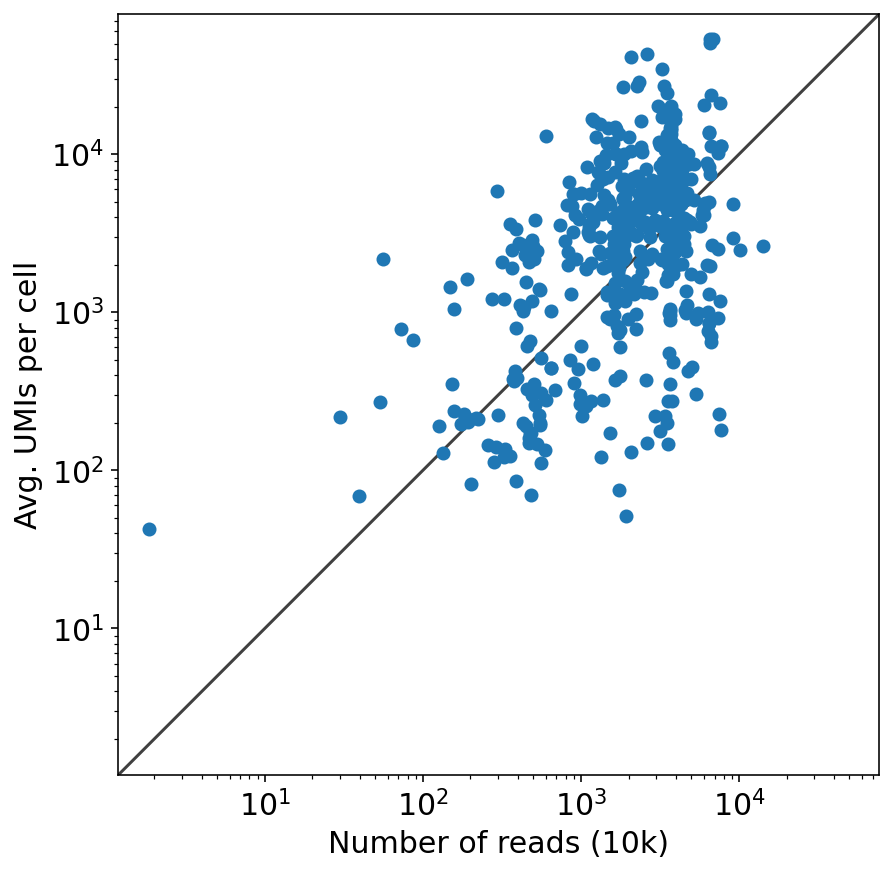

In [40]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(df["n_processed"]/1e5, df["avg_per_cell"])
ax.set(**{
    "xscale": "log",
    "yscale": "log",
    "xlabel": "Number of reads (10k)",
    "ylabel": "Avg. UMIs per cell"
})
yex(ax)
fig.show()

In [ ]:
# restrict to pbmc. cite normalization
# add pseudoalignment rate
# scatter plot- one axis is depth of sequencing, vs threshold each dot is one observation, colored by tissue

In [16]:
from scipy.stats import pearsonr

In [17]:
pearsonr(np.log(df["density"]), np.log(df["overdispersion"]))

(-0.39342051730703537, 1.3843626909477122e-20)

In [85]:
h

'overdispersion'

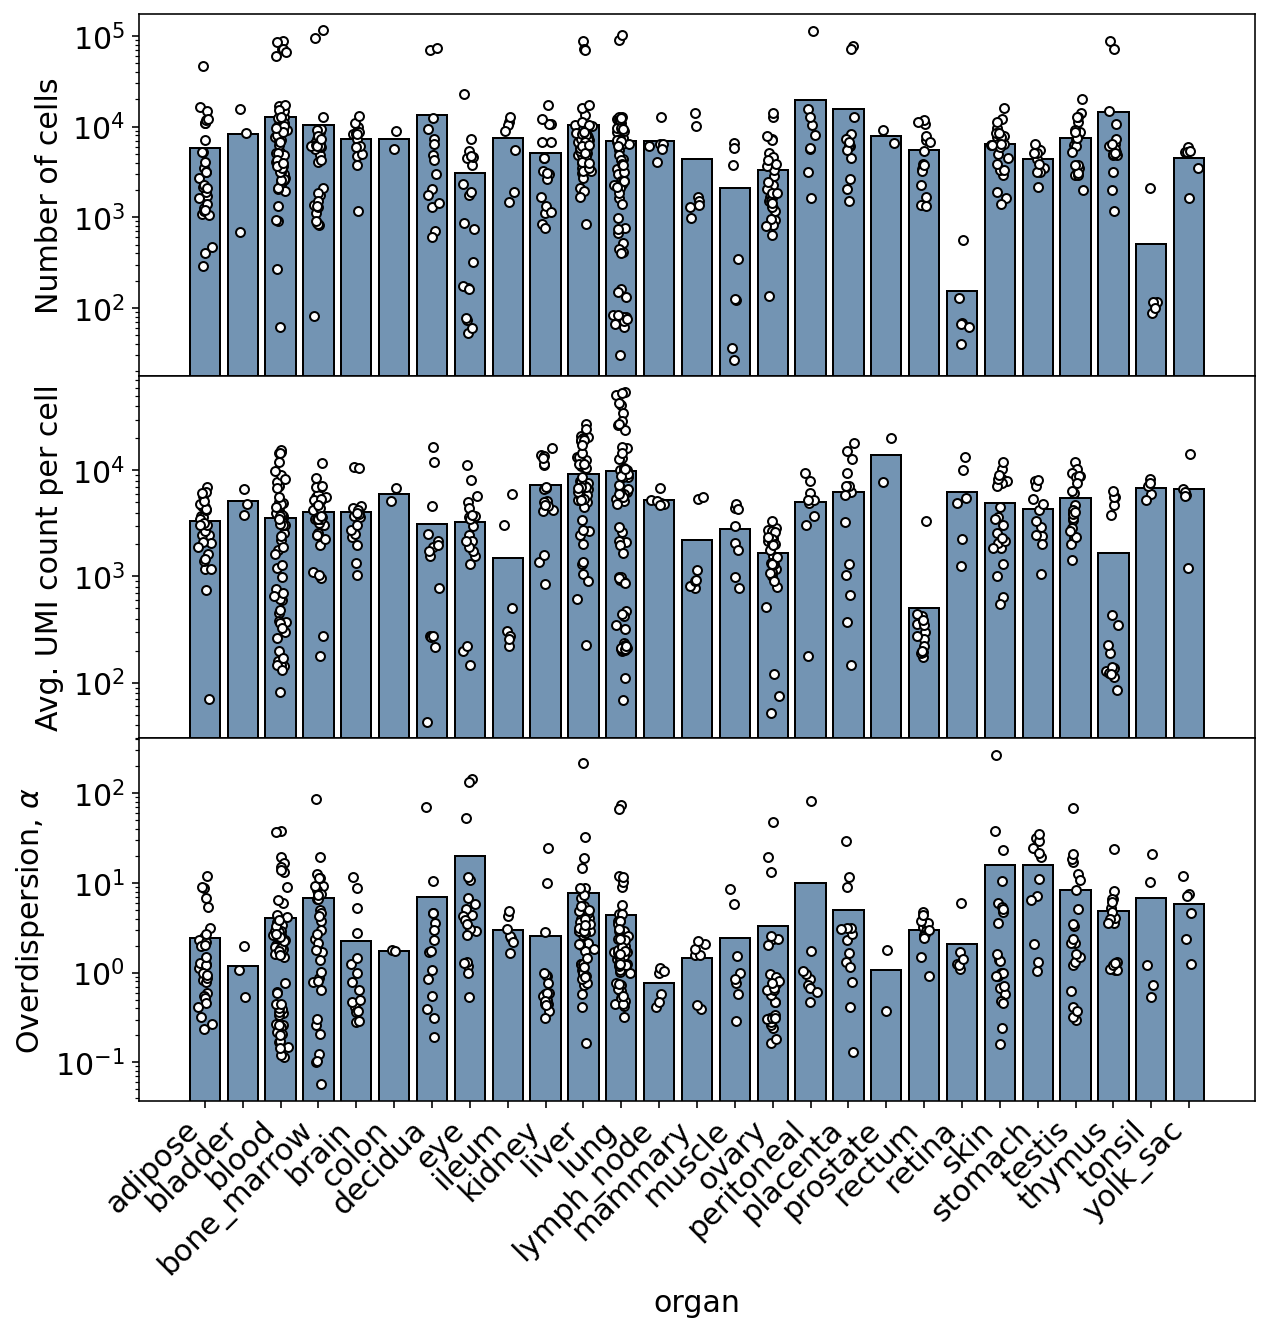

In [14]:
fig, axs = plt.subplots(figsize=(10,10),nrows=3)
fig.subplots_adjust(hspace=0)

for idx, (ax, h, ylabel) in enumerate(zip(axs, 
                                          ["ncells", "avg_per_cell", "overdispersion"],
                                          ["Number of cells", "Avg. UMI count per cell", r"Overdispersion, $\alpha$"])):
    gb = df.groupby("organ")[h].apply(list)
    data = gb.values
    labels = gb.index.values
    xticks = np.arange(1, len(labels)+1)  # the label locations
    for didx, d in enumerate(data):
        x = xticks[didx]
        xx = np.random.normal(x, 0.08, size=len(d))

        # actual points
        ax.scatter(xx, d, s = 20, color="white", edgecolor="black", linewidth=1)

        # mean and error bars
        mean = np.mean(d)
        stdev = np.sqrt(np.var(d))

        ax.bar(x, mean, color="#7394B3", edgecolor="black", linewidth=1, zorder=-10)#, s=100, zorder=10)    
        # ax.vlines(x, mean - stdev, mean+stdev, color='lightgrey', linestyle='-', lw=2, zorder=9)


    ax.set(**{
        "xlabel": "organ",
        "ylabel": ylabel,
        "xticks": xticks,
        "yscale": "log",
    })
ax.set_xticklabels(labels, rotation=45, ha="right")
#fig.savefig("figures/mx_inspect.png", dpi=300, bbox_inches="tight")
fig.show()

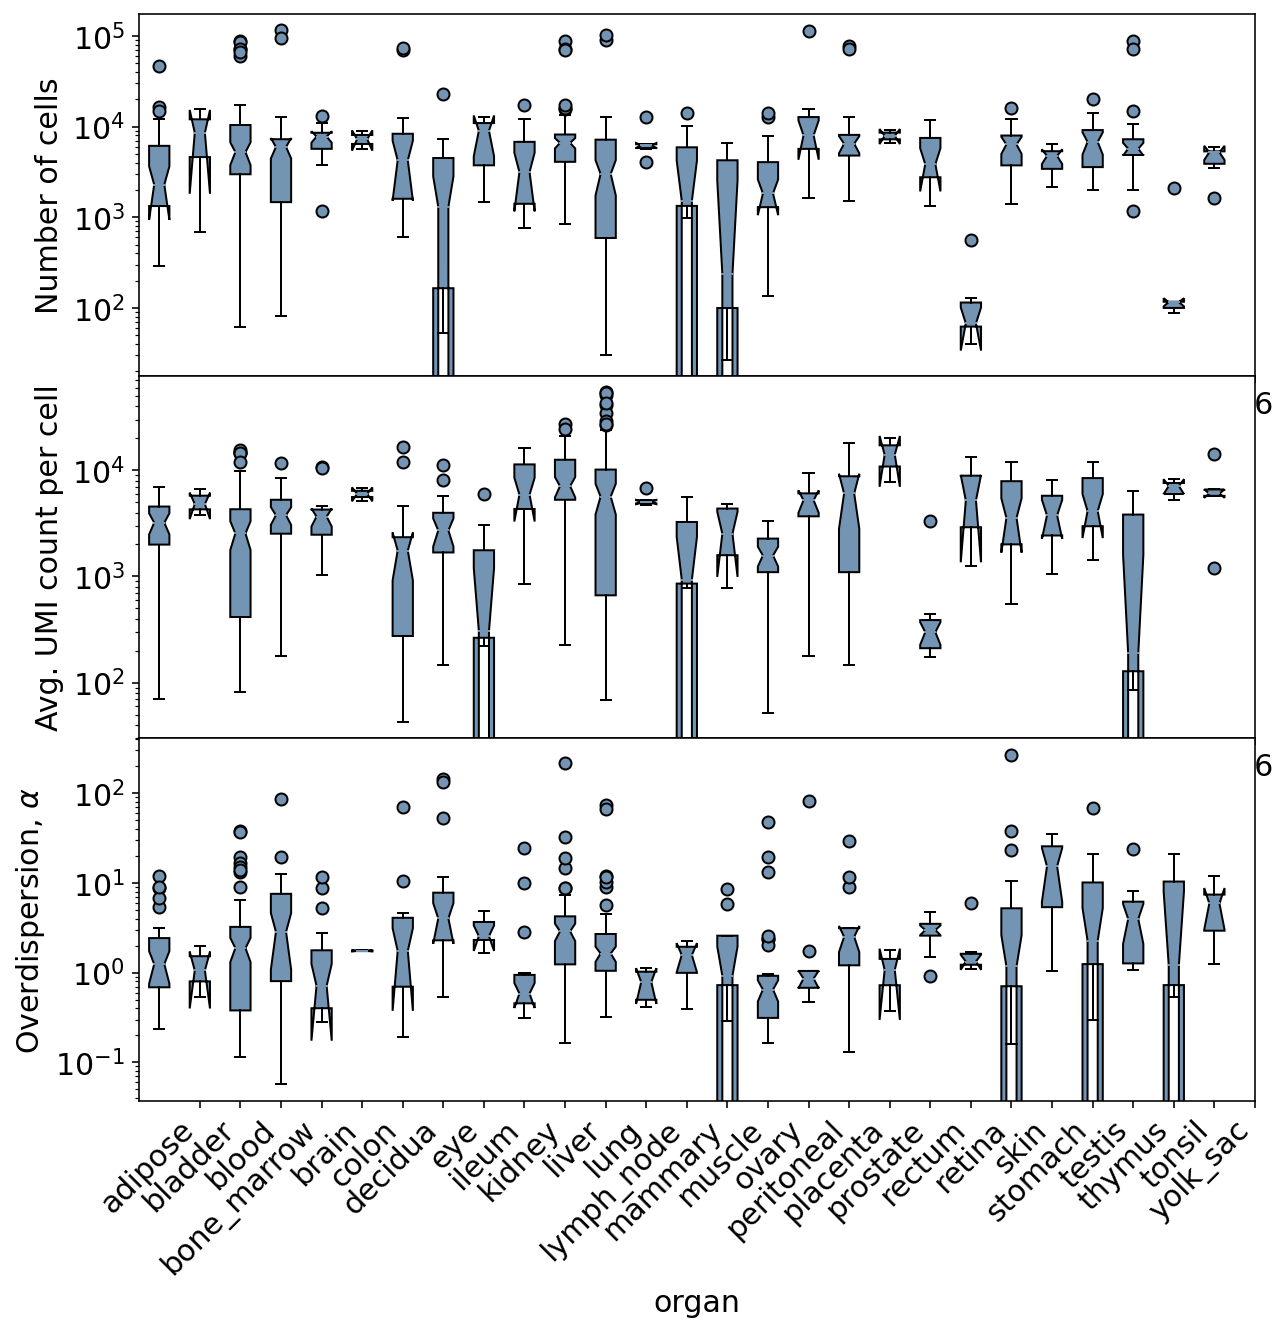

In [21]:
fig, axs = plt.subplots(figsize=(10,10),nrows=3)
fig.subplots_adjust(hspace=0)

for idx, (ax, h, ylabel) in enumerate(zip(axs, 
                                          ["ncells", "avg_per_cell", "overdispersion"],
                                          ["Number of cells", "Avg. UMI count per cell", r"Overdispersion, $\alpha$"])):
    gb = df.groupby("organ")[h].apply(list)
    data = gb.values
    labels = gb.index.values
    xticks = np.arange(1, len(labels)+1)  # the label locations
    ax.boxplot(gb, positions=np.arange(len(labels)), 
               patch_artist=True, notch=True,
               boxprops=dict(facecolor="#7394B3"), 
               medianprops=dict(color="#7394B3"),
               flierprops=dict(markerfacecolor="#7394B3", markeredgecolor='k')
              )
#     for didx, d in enumerate(data):
#         x = xticks[didx]
#         xx = np.random.normal(x, 0.08, size=len(d))

#         # actual points
#         ax.scatter(xx, d, s = 20, color="white", edgecolor="black", linewidth=1)

#         # mean and error bars
#         mean = np.mean(d)
#         stdev = np.sqrt(np.var(d))

#         ax.bar(x, mean, color="#7394B3", edgecolor="black", linewidth=1, zorder=-10)#, s=100, zorder=10)    
#         # ax.vlines(x, mean - stdev, mean+stdev, color='lightgrey', linestyle='-', lw=2, zorder=9)


    ax.set(**{
        "xlabel": "organ",
        "ylabel": ylabel,
        "xticks": xticks,
        "yscale": "log",
    })
ax.set_xticklabels(labels, rotation=45, ha="right")
#fig.savefig("figures/mx_inspect.png", dpi=300, bbox_inches="tight")
fig.show()

In [18]:
gb.values

array([list([0.589394805098669, 2.524642247031318, 5.442121693797073, 1.140771248166273, 2.333228340063742, 1.245261245011141, 3.1848166200737262, 1.2726135924595, 11.816079628720246, 2.023552433224961, 1.221584300921919, 8.678702446730716, 0.832427055216942, 2.173888779981348, 1.978692450055953, 1.511035029160174, 0.31684736253552703, 2.713922266976466, 0.7832210475865641, 0.9965974293927531, 2.036926745462664, 0.8652114210185171, 6.785796507546531, 9.082675709833607, 0.9408737860571341, 0.543752878117385, 0.527881037845197, 0.46065729929928806, 0.23403344796630102, 0.266409901043279, 0.41180232790262206]),
       list([1.9941651794651922, 1.057790256622457, 0.5399059923278761]),
       list([19.232908132599473, 16.53583118629515, 2.609554972641642, 2.022247748007974, 2.613493244636029, 1.942439337330606, 15.09361396834692, 1.4952663134428201, 2.4466328371683472, 1.648126128797236, 1.6571770572758, 1.8337867961304801, 1.599070585464594, 3.381841830253086, 13.224140471572985, 13.910594

In [93]:
df.groupby("organ")["avg_per_cell"].apply(np.mean).mean()


4960.125676254508